In [1]:
from overfit.utils.misc import sharpen
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch

In [66]:
def plot_sharpen_example(confidences=[0.3, 0.6, 0.995]):
    n = 25
    x = np.linspace(0, 1.5 * np.pi, n)
    sin_x = np.sin(x) + np.random.uniform(0, 0.01, n)
    sin_x = torch.Tensor(sin_x).type(torch.float64)

    fig = plt.figure()
    sin_x_norm = torch.nn.functional.softmax(sin_x, dim=0)
    plt.plot(sin_x_norm, label="Base $(\\alpha=0)$", color="black")
    for ix, conf in enumerate(confidences):
        sin_x_sharpen_low = sharpen(sin_x_norm, T=1 - conf, dim=0)
        plt.plot(sin_x_sharpen_low, label=f"Sharpened $(\\alpha={conf})$", color="red", alpha=conf)
    fig.legend()
    plt.savefig("sharpen.png")

    plt.show()

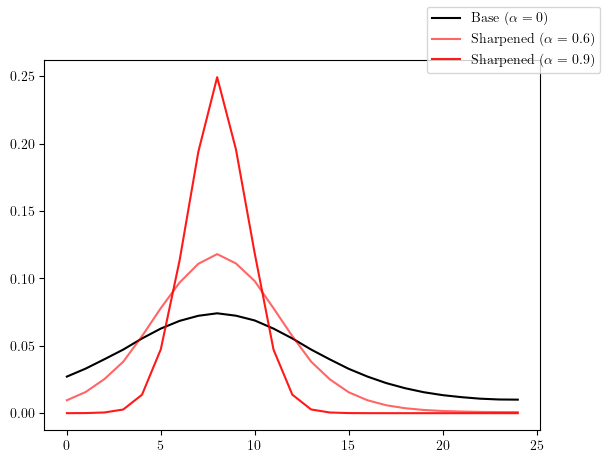

In [67]:
plot_sharpen_example(confidences=[0.6, 0.9])